# Randomness in NumPy!

## Pro tip

Always check your production environment before you deploy.  Otherwise you might, as a hypothetical example, end up trying to give a presentation and find out the libraries you need aren't installed.

## Announcements

- All future assignments and lessons will be on `Prairielearn` now.
- For your labs, you will log in to https://prairietest.org to get started.
- We are creating a canvas site for the course; main use will be as a gradebook.

## Randomness

Why do we want random numbers?

In [26]:
import numpy.random as rand
import numpy as np
from matplotlib.pyplot import imshow,show,plot
import matplotlib.pyplot as plt


In [4]:
rand.randint(1,100,3)

array([84, 64, 78])

In [5]:
print(rand.randint.__doc__)


        randint(low, high=None, size=None, dtype=int)

        Return random integers from `low` (inclusive) to `high` (exclusive).

        Return random integers from the "discrete uniform" distribution of
        the specified dtype in the "half-open" interval [`low`, `high`). If
        `high` is None (the default), then results are from [0, `low`).

        .. note::
            New code should use the ``integers`` method of a ``default_rng()``
            instance instead; please see the :ref:`random-quick-start`.

        Parameters
        ----------
        low : int or array-like of ints
            Lowest (signed) integers to be drawn from the distribution (unless
            ``high=None``, in which case this parameter is one above the
            *highest* such integer).
        high : int or array-like of ints, optional
            If provided, one above the largest (signed) integer to be drawn
            from the distribution (see above for behavior if ``high=None``).
 

## Reminder of a couple of utilities

In [6]:
"5,20".split(",")

['5', '20']

In [7]:
"3d20".split("d")

['3', '20']

In [10]:
sum(np.array([2,5,9]))

16

## Try this!

Anyone play tabletop games like Dungeons and Dragons?  Make a dice rolling function.

Call `roll("3d6")` to roll 3 6-sided dices and return the sum.

In [13]:
"2d20".split("d")

['2', '20']

In [14]:
rand.randint(1,21,2)

array([ 1, 11])

In [21]:
def roll(spec):
    times = 1
    size = 1
    try:
        [times,size] = spec.split("d")
    except:
        print("Invalid format.")
        return 0
    result = sum(rand.randint(1,int(size)+1,int(times)))
    return result

In [25]:
roll("3d6")

8

In [12]:
sum(rand.randint(1,7,3))

12

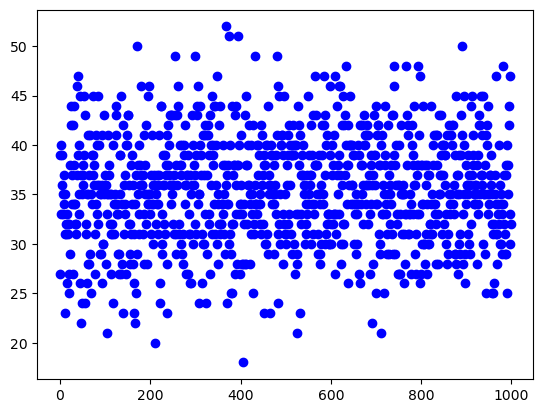

In [28]:
numbers = list(map(lambda x: roll("10d6") , range(1000)))
plt.plot( numbers,'bo' )

## Shuffle and Choice

- `shuffle` randomizes the order
- `choice` picks a random element.

What if you wanted to pick 5 random elements and be sure that nothing got picked twice?

Write a function `pick(x,n)` that picks $n$ elements from $x$ "without repetition".

In [34]:
cards = ['a','b','c']
rand.shuffle(cards)
cards

['b', 'c', 'a']

In [35]:
rand.choice(cards)

'c'

## Distributions

If every number is equally likely, you get a *uniform* distribution.

0.5450808014552269

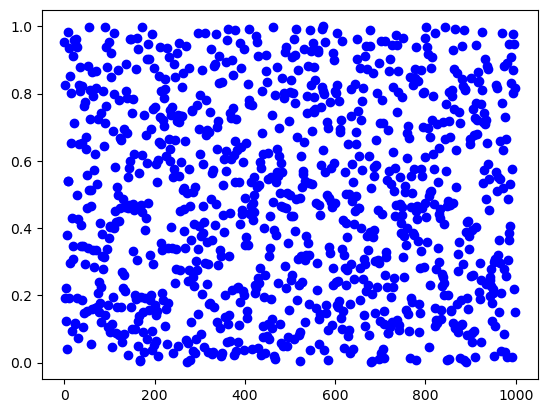

In [37]:
numbers = rand.uniform( size=1000 )
plt.plot( numbers,'bo' )
rand.uniform( ) 


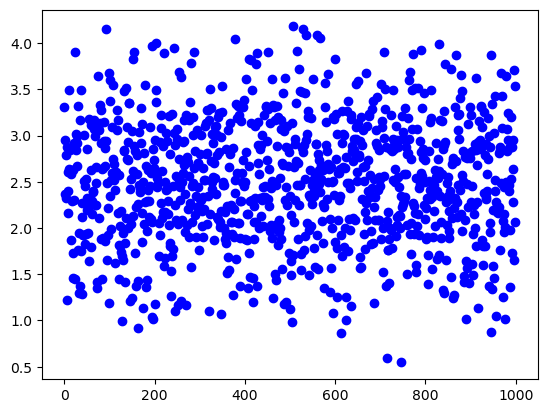

In [38]:
n1 = rand.uniform(size=1000)
n2 = rand.uniform(size=1000)
n3 = rand.uniform(size=1000)
n4 = rand.uniform(size=1000)
n5 = rand.uniform(size=1000)
plt.plot(n1 + n2 + n3 + n4 + n5, 'bo')

# When probabilities are summed...
... you get a "normal" distribution.  *Statitistics disclaimer: this is simplified a bit...*

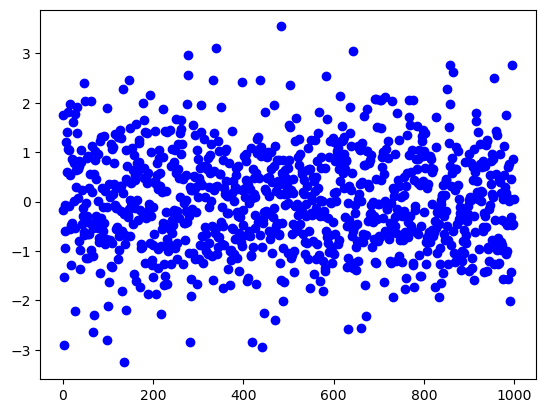

In [39]:
numbers = rand.normal( size=1000 )
plt.plot( numbers,'bo' )

# Histograms
 - Examples:
   - Show uniform histogram
   - Take histogram of 3d6 - why doesn't it work?

(array([2.000e+00, 6.700e+01, 4.050e+02, 1.327e+03, 2.705e+03, 2.974e+03,
        1.760e+03, 6.300e+02, 1.110e+02, 1.900e+01]),
 array([-3.95863513, -3.19040929, -2.42218345, -1.65395761, -0.88573177,
        -0.11750593,  0.65071991,  1.41894575,  2.18717159,  2.95539743,
         3.72362327]),
 <BarContainer object of 10 artists>)

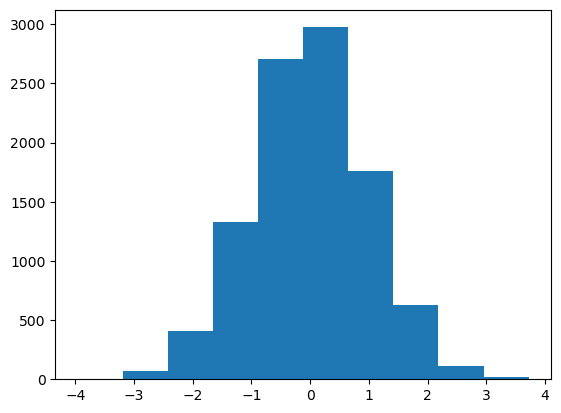

In [40]:
plt.hist(rand.normal(size=10000))

(array([ 193.,  307., 1182.,  994., 2466., 1207., 2035.,  708.,  736.,
         172.]),
 array([ 3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. , 16.5, 18. ]),
 <BarContainer object of 10 artists>)

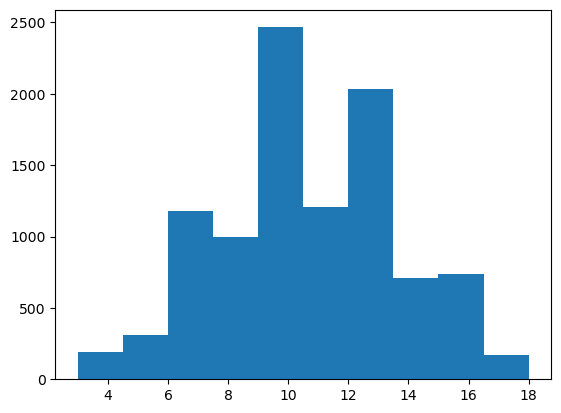

In [41]:
plt.hist(rand.randint(1,7,10000) + rand.randint(1,7,10000) + rand.randint(1,7,10000))

## Fern Fractals
Let's do a random fractal!

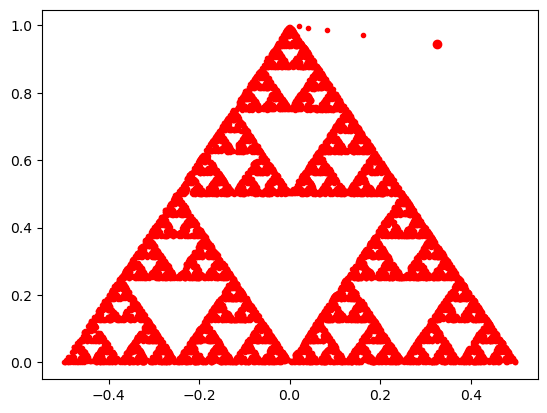

In [42]:
px = [ -0.5, 0, 0.5]
py = [ 0, 1, 0 ]

rx = rand.uniform()
ry = rand.uniform()
plt.plot(rx,ry,"ro")

for i in range(10000):
    z = rand.randint(0,3)
    rx = (rx + px[z])/2
    ry = (ry + py[z])/2
    plt.plot(rx,ry,"r.")

In [48]:
def estPi(times):
    inCount = 0
    for i in range(times):
        x = rand.uniform()
        y = rand.uniform()
        if (np.sqrt(x*x + y * y) <= 1.0):
            inCount = inCount + 1
    return inCount * 4 / times

In [61]:
estPi(1000000)

3.141792